In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [84]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')
df = df.dropna()
y = df.iloc[:, 7]
y=y.astype('int')
x = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
x.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)
x
for i in range(5547):
    if( type(x.iloc[i,1]) != type(float(0))):
        z = x.iloc[i,1][:2]
        x.iloc[i,1] = int(z)
        if(x.iloc[i,1] == 0):
            x.iloc[i,1] = 1
    else:
        x.iloc[i,1] = 1
selector = SelectKBest(f_classif, k=20)
x = selector.fit_transform(x, y)
z = 0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2094 2095] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [85]:
x=x.astype('int')

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = preprocessing.StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [87]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train2, y_train)  

SVC()

In [88]:
y_pred= classifier.predict(x_test_scaled)  
y_pred_train= classifier.predict(x_train2)

In [89]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)  

Text(0.5, 427.9555555555555, 'Predicted label')

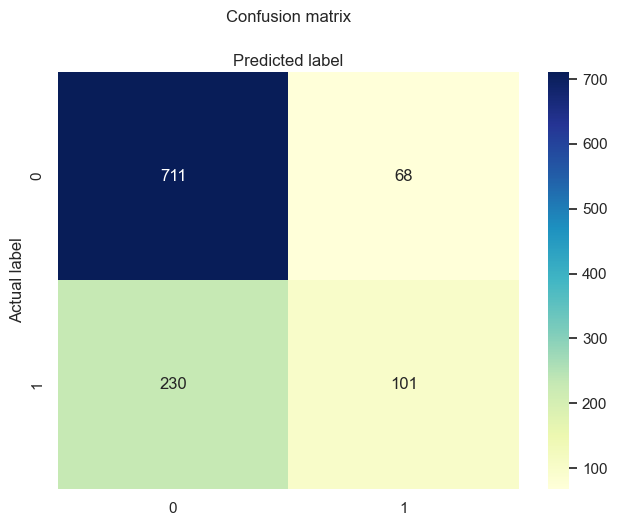

In [90]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
from sklearn.metrics import classification_report
print("Testing Accuracy")
target_names = ['doesn\'t die', 'dies']
print(classification_report(y_test, y_pred, target_names=target_names))
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, y_pred)


Testing Accuracy
              precision    recall  f1-score   support

 doesn't die       0.76      0.91      0.83       779
        dies       0.60      0.31      0.40       331

    accuracy                           0.73      1110
   macro avg       0.68      0.61      0.62      1110
weighted avg       0.71      0.73      0.70      1110



0.7315315315315315

In [94]:
#training accuracy
print("Training Accuracy")
accuracy_score(y_pred_train, y_train)

Training Accuracy


0.7879197656073924